# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## TRATAMIENTO Y LIMPIEZA DE LOS DATOS A ESTUDIAR

## 1. Unión de las preguntas separadas en varias columnas (q10, q39)

In [7]:
# abrimos el .csv con los datos de Data Analyst para las preguntas relevantes seleccionadas
df = pd.read_csv('../resultados/df_da_relevante.csv', index_col = 0)
df = df.reset_index()
df.head()

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
0,16,50-54,Man,Belgium,Bachelor’s degree,20+ years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Energy/Mining,"1000-9,999 employees",5-9,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,R,R,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,Ggplot / ggplot2,Manufacturing/Fabrication,250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,Python,R,"Notepad++,Jupyter Notebook",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Non-profit/Service,0-49 employees,0,Analyze and understand data to influence produ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Basic statistical software (Microsoft Excel, G..."
3,46,22-24,Man,China,Some college/university study without earning ...,< 1 years,"Python, SQL, C, C++, Java, Javascript, MATLAB",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,NaN,Azure Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Plotly / Plotly Express",Computers/Technology,0-49 employees,0,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
4,52,40-44,Man,South Africa,Master’s degree,1-3 years,"R, SQL",R,"RStudio ,Jupyter Notebook",NaN,NaN,NaN,NaN,NaN,NaN,IBM Watson Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Manufacturing/Fabrication,250-999 employees,1-2,Analyze and understand data to influence produ...,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Local development environments (RStudio, Jupyt..."


In [8]:
# sacamos los nulos para monitorearlos a lo largo del proceso
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
index,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
0,0,0,0,0,0,0,143,144,146,1508,1639,2191,2287,2124,2286,2204,2250,2267,2132,2114,2231,2281,2280,2276,1643,2206,193,114,130,150,227,1069,1858,2266,2252,2278,1739,2208,1863,2104,2251,1884,2253,533


In [9]:
# creamos una lista con las respuestas de la q10 unificadas
lista_futura_q10 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q10" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == "":
                    valor = np.nan 
    lista_futura_q10.append(valor.strip(','))
lista_futura_q10[:4]

['Kaggle Notebooks,Colab Notebooks,Databricks Collaborative Notebooks',
 'Google Cloud Datalab',
 'Kaggle Notebooks,Colab Notebooks',
 'Kaggle Notebooks,Azure Notebooks']

In [10]:
# creamos una lista con las respuestas de la q39 unificadas
lista_futura_q39 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q39" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == "":
                    valor = np.nan 
    lista_futura_q39.append(valor.strip(','))
lista_futura_q39[:10]

['',
 '',
 'I do not share my work publicly',
 '',
 'I do not share my work publicly',
 '',
 '',
 '',
 '',
 '']

In [11]:
# creamos las columnas unificadas en el dataframe y borramos las sobrantes
df['q10'] = lista_futura_q10
df['q39'] = lista_futura_q39
df.sample(3)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41,q10,q39
2095,23581,18-21,Man,India,Bachelor’s degree,1-3 years,"Python, SQL, C++",Python,Jupyter Notebook,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn",Online Service/Internet-based Services,250-999 employees,20+,Analyze and understand data to influence produ...,Tableau,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Kaggle Notebooks,Colab Notebooks","GitHub,Kaggle"
1556,17224,30-34,Man,Singapore,Master’s degree,3-5 years,"Python, R, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Computers/Technology,"1000-9,999 employees",1-2,Analyze and understand data to influence produ...,"Microsoft Power BI, Tableau",Tableau,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...",Kaggle Notebooks,"GitHub,Kaggle"
1702,18904,18-21,Man,Bangladesh,Bachelor’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accounting/Finance,0-49 employees,0,Build and/or run the data infrastructure that...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",,


In [12]:
df.drop(columns=spv.columnas_sobrantes, inplace=True)
df.sample()

,index,age,gender,q3,q4,q6,q7,q8,q9,q14,q20,q21,q22,q24,q34,q35,q41,q10,q39
510,5926,22-24,Man,India,Master’s degree,I have never written code,NaN,NaN,NaN,NaN,Online Business/Internet-based Sales,0-49 employees,1-2,Analyze and understand data to influence produ...,NaN,NaN,NaN,,


In [13]:
# reordenamos las columnas
df = df.reindex(columns = ['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14', 'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'])

In [14]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,144,146,0,193,114,130,150,227,1069,1858,0,533


In [15]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
1448,35-39,Man,Portugal,Bachelor’s degree,I have never written code,NaN,NaN,NaN,,NaN,Accounting/Finance,0-49 employees,0,Analyze and understand data to influence produ...,NaN,NaN,,NaN
1978,25-29,Man,Kenya,Bachelor’s degree,3-5 years,Python,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1739,30-34,Woman,India,Professional doctorate,5-10 years,"Python, R, SQL",Python,"RStudio ,Visual Studio , Spyder,Jupyter Notebook",None,None,Other,50-249 employees,20+,Analyze and understand data to influence produ...,None,NaN,I do not share my work publicly,"Basic statistical software (Microsoft Excel, G..."


In [16]:
df['q24'][3]

'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data, Build prototypes to explore applying machine learning to new areas, Build and/or run a machine learning service that operationally improves my product or workflows'

In [17]:
df['q41'][18]

nan

In [18]:
dict_keys = list(spv.dict_changes.keys())

In [19]:
def limpiar_columna(row):
    if row in dict_keys:
        return row.replace(spv.dict_changes, inplace = True)
    else:
        return row

In [20]:
hue_cols = []
for col in df.columns:
    if col not in spv.columnas_unidas:
        hue_cols.append(col)
    else:
        pass

In [21]:
for col in spv.columnas_unidas:
    df[col] = df[col].apply(limpiar_columna)

In [22]:
df.sample(2)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
1802,30-34,Man,South Korea,Bachelor’s degree,< 1 years,Python,Python,"Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...",None,"Matplotlib ,Seaborn",Online Service/Internet-based Services,0-49 employees,0,Analyze and understand data to influence produ...,None,NaN,"GitHub,Kaggle","Local development environments (RStudio, Jupyt..."
1704,45-49,Woman,Spain,Some college/university study without earning ...,1-3 years,"SQL, Java, Javascript",R,"Visual Studio , Notepad++",None,None,Computers/Technology,"10,000 or more employees",20+,Analyze and understand data to influence produ...,Microsoft Power BI,NaN,I do not share my work publicly,"Business intelligence software (Salesforce, Ta..."


In [23]:
for col in spv.columnas_unidas:
    df[col] = df[col].str.split(',')

In [24]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,144,146,0,193,114,130,150,227,1069,1858,0,533


In [25]:
df.to_csv('../resultados/df_da_relevante_limpio.csv')

In [26]:
df.columns

Index(['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14',
       'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'],
      dtype='object')

In [27]:
spv.columnas_unidas

['q7', 'q9', 'q10', 'q14', 'q20', 'q24', 'q39', 'q41']

In [28]:
hue_cols

['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35']

In [29]:
df['q9'] = df['q9'].apply(limpiar_columna)

In [30]:
df['q24']

0       [Analyze and understand data to influence prod...
1                                                     NaN
2       [Analyze and understand data to influence prod...
3       [Analyze and understand data to influence prod...
4       [Analyze and understand data to influence prod...
                              ...                        
2296    [Analyze and understand data to influence prod...
2297    [Analyze and understand data to influence prod...
2298                                                  NaN
2299    [ Experimentation and iteration to improve exi...
2300    [Analyze and understand data to influence prod...
Name: q24, Length: 2301, dtype: object

In [31]:
df_q7 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q21', 'q22', 'q34', 'q35']]
df_q9 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q9', 'q21', 'q22', 'q34', 'q35']]
df_q10 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q10', 'q21', 'q22', 'q34', 'q35']]
df_q14 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q14', 'q21', 'q22', 'q34', 'q35']]
df_q20 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q20', 'q21', 'q22', 'q34', 'q35']]
df_q24 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q24', 'q34', 'q35']]
df_q39 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q39']]
df_q41 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q41']]

In [32]:
df_q7 = df.explode('q7')
df_q9 = df.explode('q9')
df_q10 = df.explode('q10')
df_q14 = df.explode('q14')
df_q20 = df.explode('q20')
df_q24 = df.explode('q24')
df_q39 = df.explode('q39')
df_q41 = df.explode('q41')

<Axes: xlabel='count', ylabel='q7'>

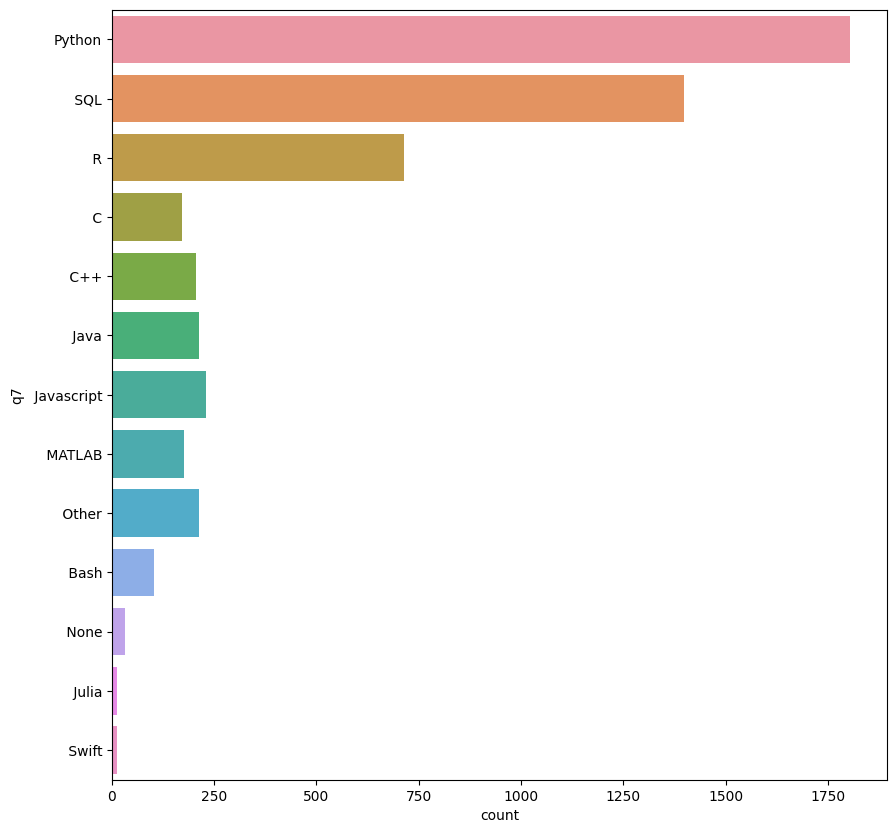

In [33]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', data = df_q7)

<Axes: xlabel='count', ylabel='q9'>

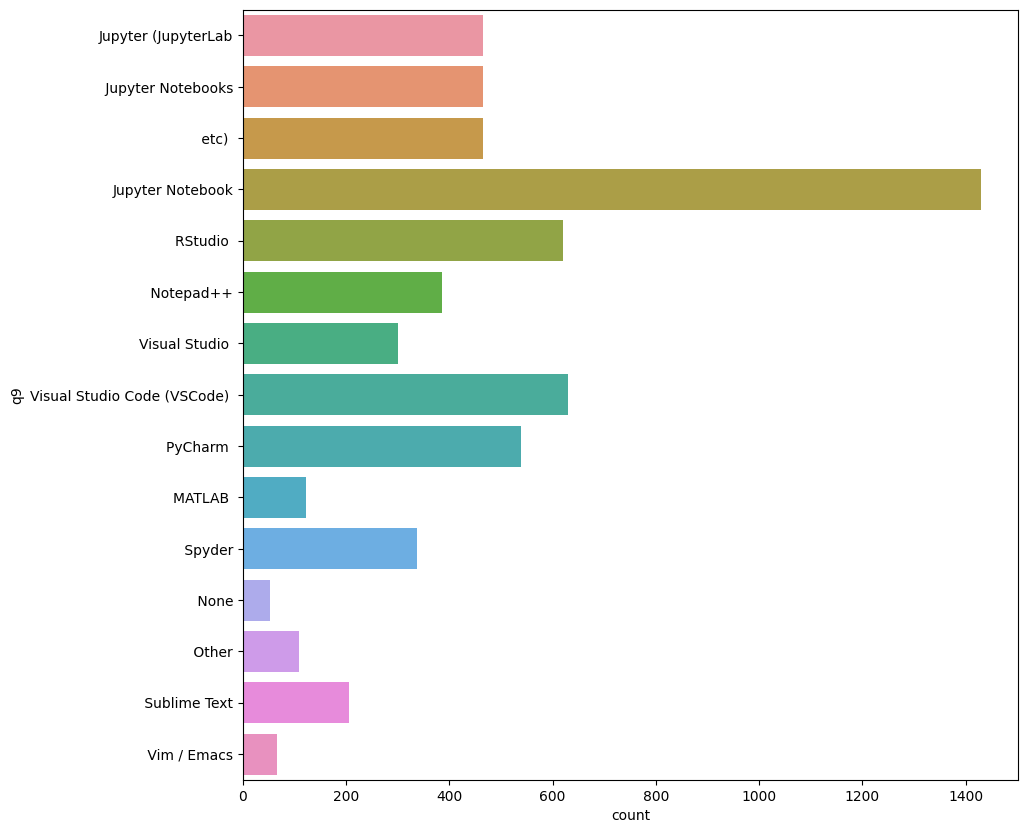

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q9', data = df_q9)

<Axes: xlabel='count', ylabel='q24'>

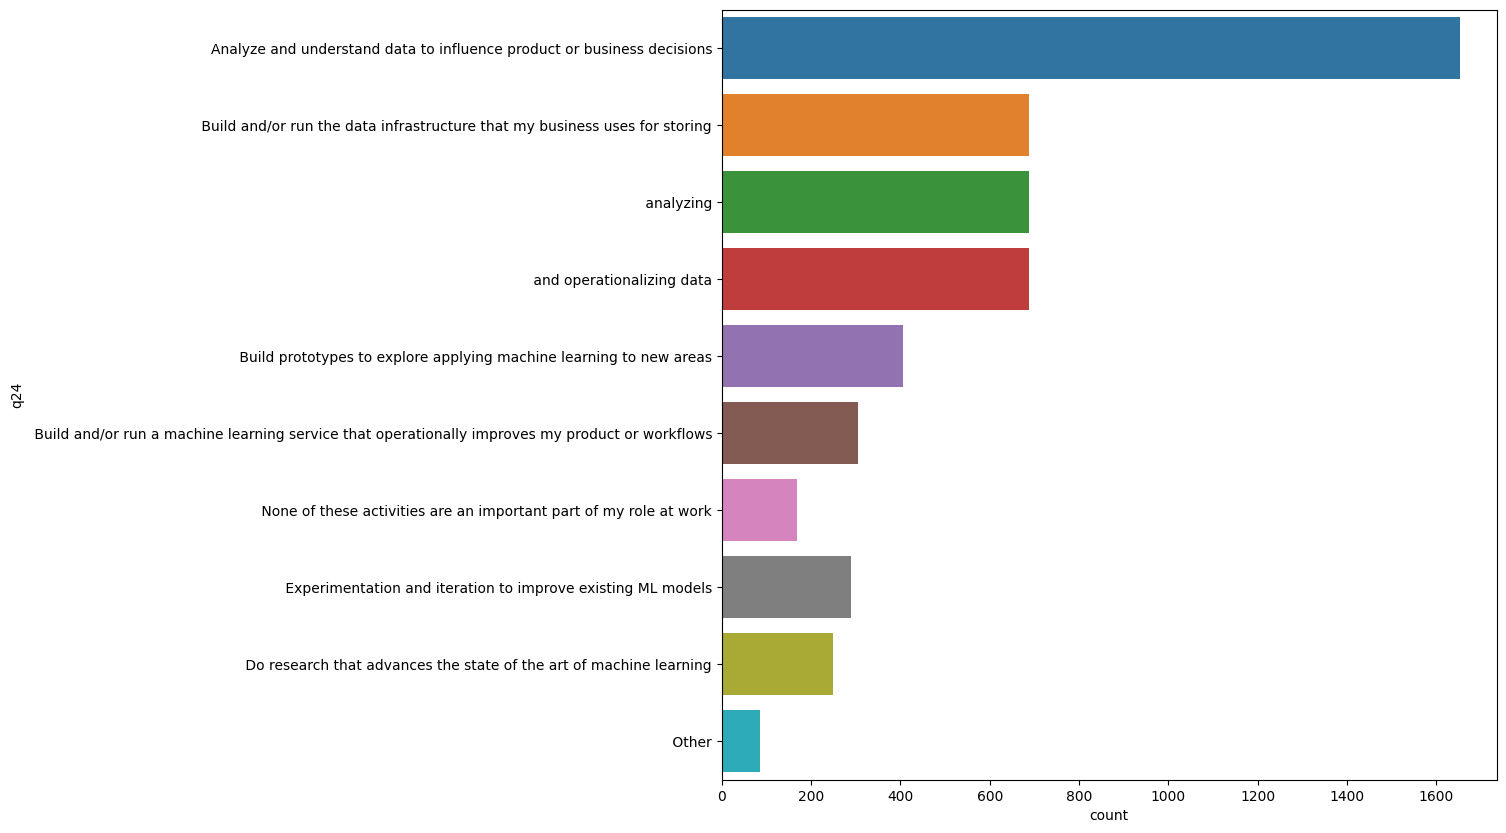

In [35]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q24', data = df_q24)

<Axes: xlabel='count', ylabel='q39'>

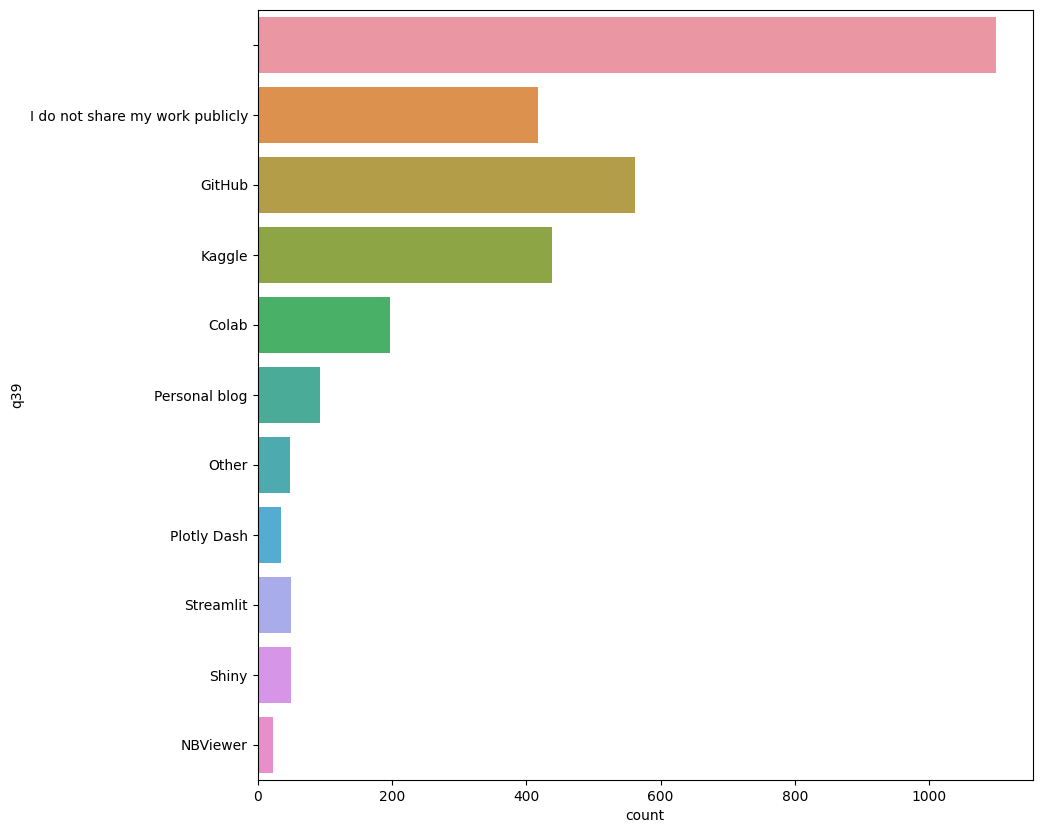

In [36]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q39', data = df_q39)

<Axes: xlabel='count', ylabel='q41'>

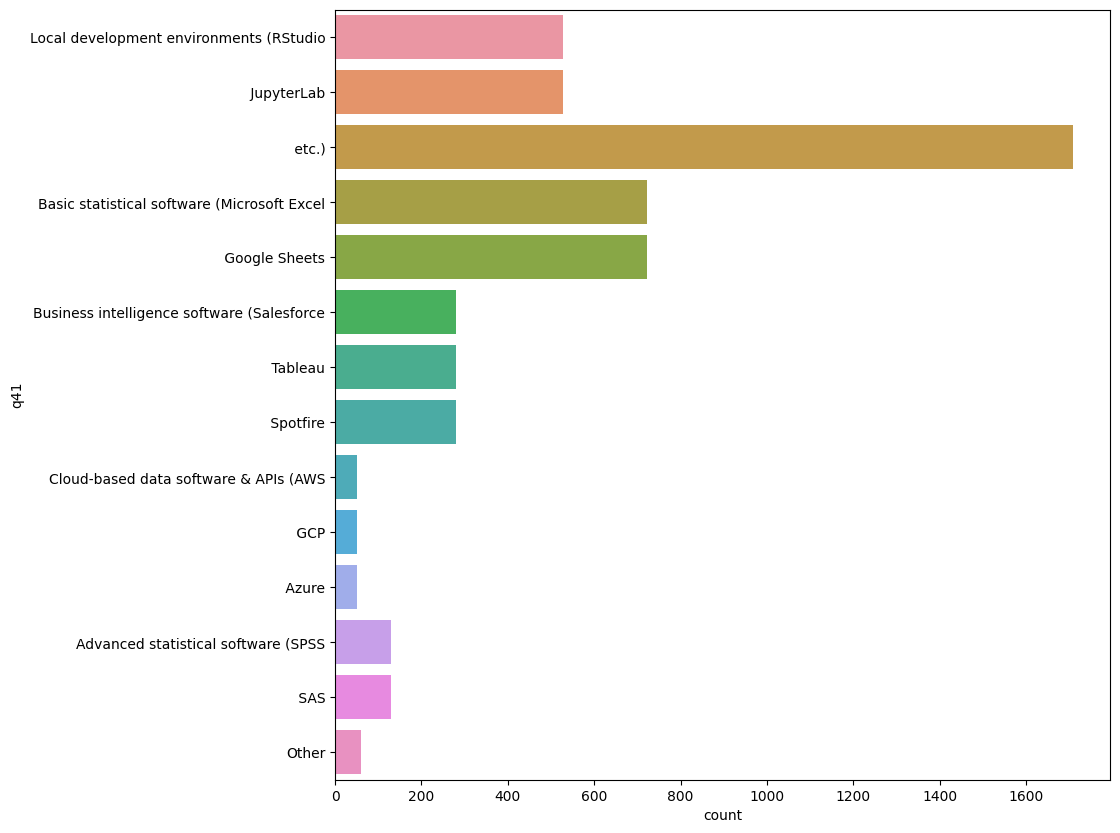

In [37]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q41', data = df_q41)

<Axes: xlabel='count', ylabel='q9'>

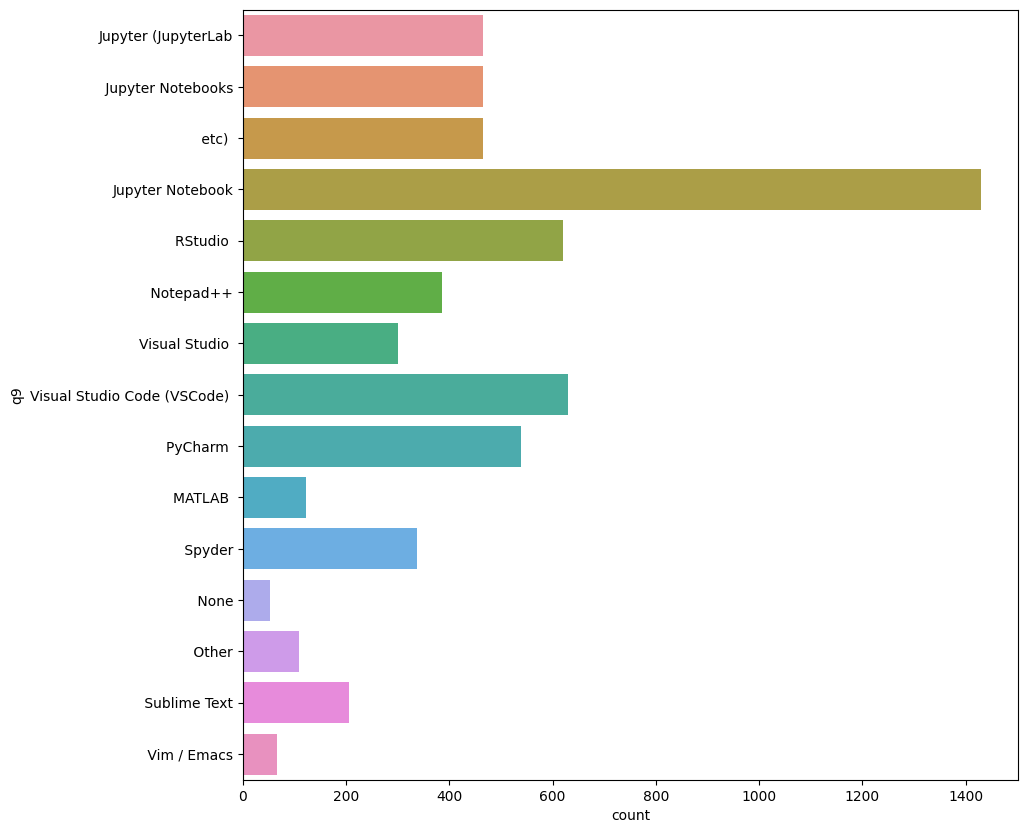

In [38]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q9', data = df_q9)

<Axes: xlabel='count', ylabel='q14'>

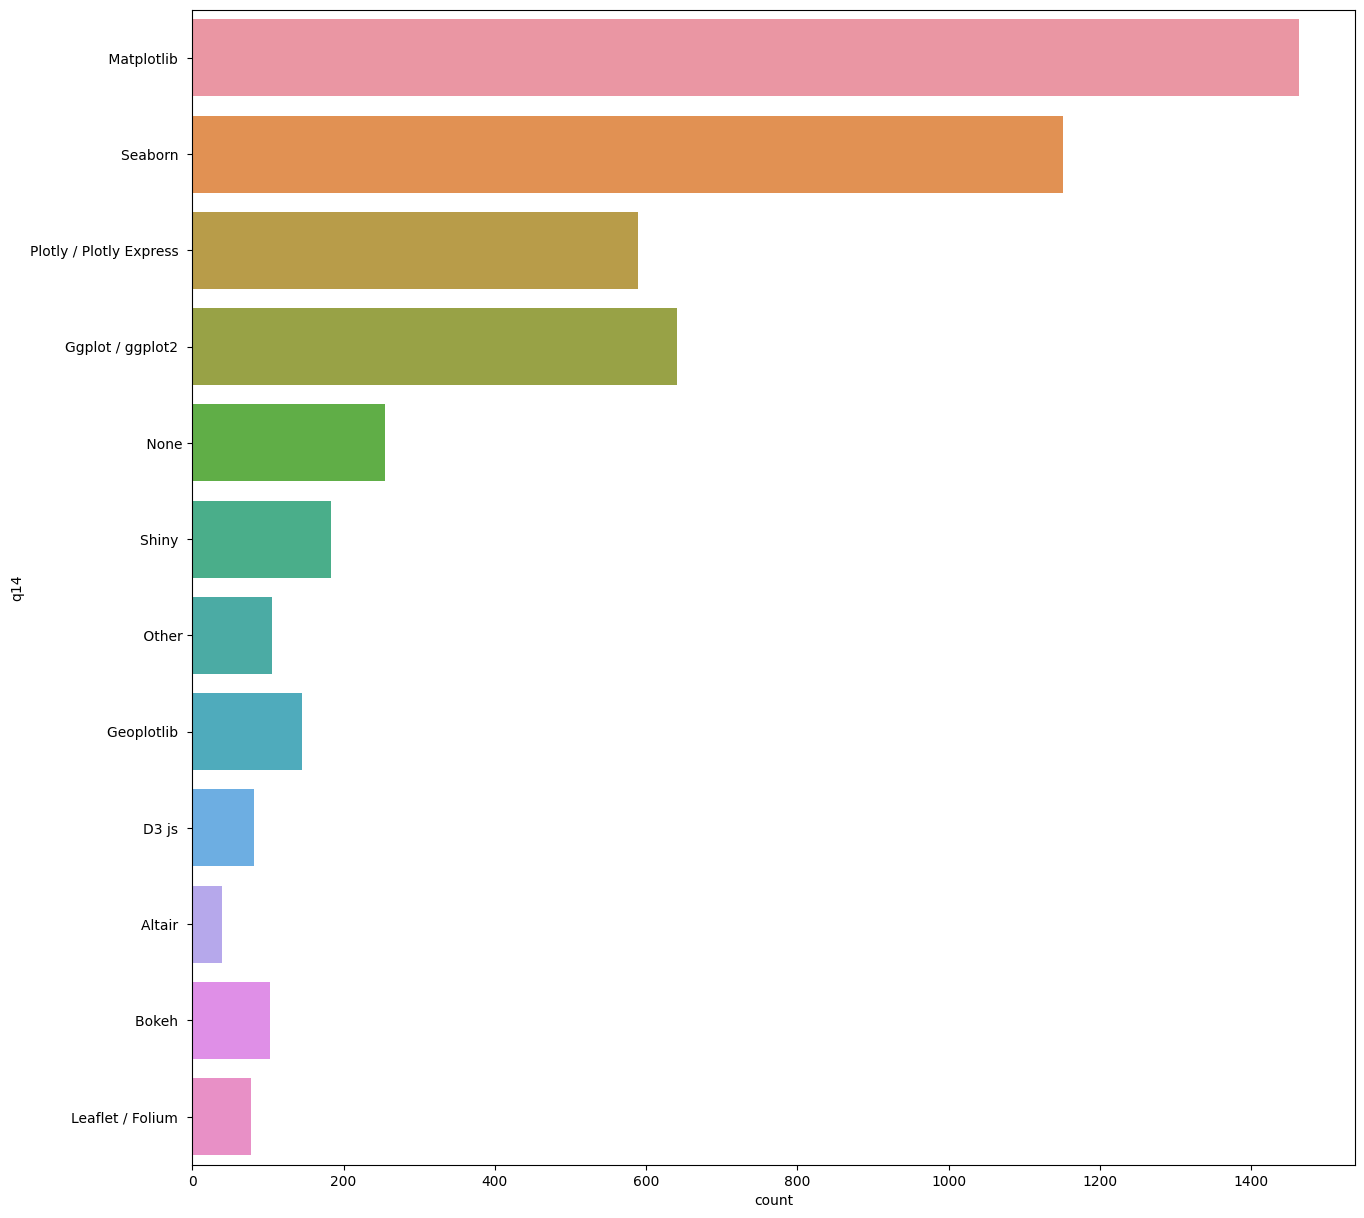

In [39]:
plt.figure(figsize = (15,15))
sns.countplot(y = 'q14', data = df_q14)

In [40]:
df_explode = df[lista_qs_exp]

NameError: name 'lista_qs_exp' is not defined

In [ ]:
df_explode.head()

In [ ]:
df_explode.sample(5)

In [ ]:
# df["q7"] = df["q7"].str.split(',')

In [ ]:
df.sample(3)

In [ ]:
# df["q7"].drop_duplicates(inplace=True)
# df["q7"] = df["q7"].explode()

In [ ]:
# for q in lista_qs_exp:
#     df[q] = df[q].str.split(',')
#     df[q] = df[q].explode(q)


In [ ]:
# Dividimos las respuestas de la pregunta q7 por la ','
# for con in 
# df["q7"] = df["q7"].str.split(",")
# df_q7 = df_ana2.explode("q7")
# sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
df.isnull().sum()/df.shape[0]

In [ ]:
# #probamos rename
# def renombrar_columnas(dataframe,inicio,final,num_q):
#     nom_col = {}
#     for col in dataframe.columns[inicio : final+1]:
#         try: 
#             for i in dataframe[col].unique():
#                 i = str(i) 
#                 if i != 'nan':
#                     i = i.strip().replace(' ', '_')
#                     nom_col[col] = f'q{num_q}_{i}'
#                 else:
#                     pass
#         except:
#             print('estoy en el except con la columna {col} , elemento {i}')
            
#     renombrado = dataframe.rename(columns = nom_col)
    
#     return renombrado

In [ ]:
df = renombrar_columnas(df, 8, 24, 10)


In [ ]:
df.sample(3)

In [ ]:
df = renombrar_columnas(df, 28, 37, 39)

In [ ]:
df.columns

In [ ]:
df_ana = df.copy()
df_ana.head(2)

In [ ]:
df_ana.columns

In [ ]:
df_ana2 = df_ana[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9']]
df_ana2.head(2)

In [ ]:
df_ana2["q7"] = df_ana2["q7"].str.split(",")

In [ ]:
df_ana2.head(2)

In [ ]:
df_q7 = df_ana2.explode("q7")
df_q7.head()

In [ ]:
sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
#funcion para cambiar los nans
def yes_no(dataframe, inicio, final):
    for col in dataframe.columns[inicio:(final+1)]:
        dataframe[col] = dataframe[col].apply(lambda data: np.where(type(data) != float, 'yes', 'no'))
    return dataframe

In [ ]:
df = yes_no(df, 8, 24)

In [ ]:
df = yes_no(df, 28, 37)

In [ ]:
df.sample(3)

In [ ]:
df.isnull().sum().reset_index().T

In [ ]:
q7_responses = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

In [ ]:
# def sacar_herramienta(col):
    
#     try:
#         if re.findall(patron, col):
#             return 'yes'
#         else:
#             return 'no'
#     except:
#         return 'unknown'


In [ ]:
def sacar_herramienta(col):
    
    try:
        if re.findall(patron, col):
            return 1
        else:
            return 0
    except:
        return np.nan

In [ ]:
for patron in q7_responses:
    df[f'q7_{patron}'] = df['q7'].apply(sacar_herramienta)

df.drop(columns = 'q7', inplace = True)

In [ ]:
df.head(2)

In [ ]:
q9_responses = ['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code (VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim, Emacs or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

In [ ]:
for patron in q9_responses:
    df[f'q9_{patron}'] = df['q9'].apply(sacar_herramienta)
df.drop(columns = 'q9', inplace = True)

In [ ]:
q14_responses = ['Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']
for patron in q14_responses:
    df[f'q14_{patron}'] = df['q14'].apply(sacar_herramienta)

df.drop(columns = 'q14', inplace = True)

In [ ]:
q41_responses = ['Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 
                 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 
                 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Other']
for patron in q14_responses:
    df[f'q41_{patron}'] = df['q41'].apply(sacar_herramienta)

df.drop(columns = 'q41', inplace = True)

In [ ]:
df.sample(3)

In [ ]:
orden = ['age', 'gender', 'q3', 'q4', 'q6', 'q7_Python', 'q7_R', 'q7_SQL', 'q7_C', 'q7_C++', 'q7_Java', 'q7_Javascript', 'q7_Julia','q7_Swift', 'q7_Bash', 'q7_MATLAB', 
         'q7_None', 'q7_Other','q8', 'q9_JupyterLab', 'q9_RStudio', 'q9_Visual Studio','q9_Visual Studio Code (VSCode)', 'q9_PyCharm', 'q9_Spyder','q9_Notepad++', 
         'q9_Sublime Text', 'q9_Vim, Emacs or similar', 'q9_MATLAB', 'q9_Jupyter Notebook', 'q9_None', 'q9_Other','q10_Kaggle_Notebooks','q10_Colab_Notebooks', 'q10_Azure_Notebooks',
         'q10_Paperspace_/_Gradient', 'q10_Binder_/_JupyterHub', 'q10_Code_Ocean', 'q10_IBM_Watson_Studio', 'q10_Amazon_Sagemaker_Studio_Notebooks', 'q10_Amazon_EMR_Notebooks',
         'q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)', 'q10_Google_Cloud_Datalab', 'q10_Databricks_Collaborative_Notebooks', 'q10_Zeppelin_/_Zepl_Notebooks', 'q10_Deepnote_Notebooks',
         'q10_Observable_Notebooks', 'q10_None', 'q10_Other', 'q14_Seaborn', 'q14_Plotly / Plotly Express', 'q14_Ggplot / ggplot2', 'q14_Shiny', 'q14_D3 js', 'q14_Altair', 'q14_Bokeh', 
         'q14_Geoplotlib','q14_Leaflet / Folium', 'q14_None', 'q14_Other','q34', 'q35', 'q39_Plotly_Dash', 'q39_Streamlit', 'q39_NBViewer', 'q39_GitHub', 'q39_Personal_blog', 'q39_Kaggle', 
         'q39_Colab', 'q39_Shiny', 'q39_I_do_not_share_my_work_publicly', 'q39_Other', 'q41_Seaborn', 'q41_Plotly / Plotly Express', 'q41_Ggplot / ggplot2', 'q41_Shiny', 'q41_D3 js', 
         'q41_Altair', 'q41_Bokeh', 'q41_Geoplotlib', 'q41_Leaflet / Folium', 'q41_None', 'q41_Other']

In [ ]:
df = df.reindex(columns = orden)

In [ ]:
df.sample()

In [ ]:
df_q7 = df[df.columns[5:18]]

In [ ]:
q7_count = df_q7.sum().reset_index()

In [ ]:
q7_count.columns = ['herramienta', 'conteo']

In [ ]:
q7_count

In [ ]:
sns.barplot(y = 'herramienta', x= 'conteo', data = q7_count)

In [ ]:
sns.barplot(y = 'herramienta', x = ,hue = 'gender', data = df)

In [ ]:
for col in df.columns[5:18]:
    print(f'{col}')
    display(df[col].value_counts().reset_index())